# Домашнее задание к лекции «Задачи классификации и кластеризации»

***Задание***

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
(разделяющую плоскость можно не строить, но обратите внимание, что
класса 3).
6. Отбросьте целевую переменную и оставьте только два признака -
sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и
визуализируйте полученную кластеризацию

### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [334]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import seaborn as sns

***Изучение начальных данных***

In [335]:
iris = load_iris()

In [336]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [337]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 2.Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

***Загрузка и подготовка данных***

In [338]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names) 
df_iris = df_iris[['sepal length (cm)', 'sepal width (cm)']]

variety_iris_class = iris.target
print(variety_iris_class)
print(len(variety_iris_class))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


In [339]:
 df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [340]:
variety_iris_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3. Разделите данные на выборку для обучения и тестирования

***Подготовка модели***

In [341]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    df_iris, 
    variety_iris_class,
    # поставлен после просмотра визуализации - были некоторые области с явнымми паттернами выбросов
    # визуально области немного выравнялись
    train_size = 0.8, 
    random_state = 42)

In [342]:
print('Размер:\n Тренировочная {0} / {1}% \n Фактическая {2} / {3}% \n Из общего объема {4} / 100%'.format(
        len(X_train), 
        round(len(X_train)/len(df_iris) * 100, 2),
        len(X_test),
        round(len(X_test)/len(df_iris) * 100, 2), 
        len(df_iris))
     )

Размер:
 Тренировочная 120 / 80.0% 
 Фактическая 30 / 20.0% 
 Из общего объема 150 / 100%


### 4. Постройте модель LDA

In [343]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [344]:
# дискриминантный анализ имеет непрерывные 
# независимые переменные и качественную зависимую переменную (то есть метку класса)
lda = LinearDiscriminantAnalysis()

In [345]:
# обучаем данные - расчет коэффициентов
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [346]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [347]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [348]:
df_verify = pd.DataFrame(result)
df_verify['matched'] = df_verify.apply(lambda x: 1 if x[0] == x[1] else 0, axis=1)

In [349]:
print('Совпало {0} / {1} % предсказаний из выборки в {2} позиций'.format
      (
          df_verify['matched'].sum(),
          round(df_verify['matched'].sum() / len(df_verify) * 100, 2),
          len(df_verify)
      )
     )

Совпало 27 / 90.0 % предсказаний из выборки в 30 позиций


In [350]:
df_verify

,0,1,matched
0,1,1,1
1,0,0,1
2,2,2,1
3,1,1,1
4,1,2,0
5,0,0,1
6,1,1,1
7,2,2,1
8,1,2,0
9,1,1,1


### 5. Визуализируйте предсказания для тестовой выборки и центры классов 
(разделяющую плоскость можно не строить, но обратите внимание, что класса 3).

In [351]:
axes_train = X_train[['sepal length (cm)','sepal width (cm)']]
axes_test = X_test[['sepal length (cm)','sepal width (cm)']]

In [352]:
# анализ дискриминант
lda_train = LinearDiscriminantAnalysis()
lda_train.fit(axes_train, y_train)
# расчет центроидов
lda_train.means_

array([[4.99      , 3.4525    ],
       [5.9195122 , 2.77073171],
       [6.53333333, 2.96666667]])

In [353]:
# анализ дискриминант
lda_test = LinearDiscriminantAnalysis()
lda_test.fit(axes_test, y_test)
# расчет центроидов
lda_test.means_

array([[5.07      , 3.33      ],
       [6.01111111, 2.76666667],
       [6.78181818, 3.        ]])

Для визуального анализа / сравнения нанесем на график сразу:
* и ***train predicted*** - предсказанные значения 
* и ***test*** - фактические 

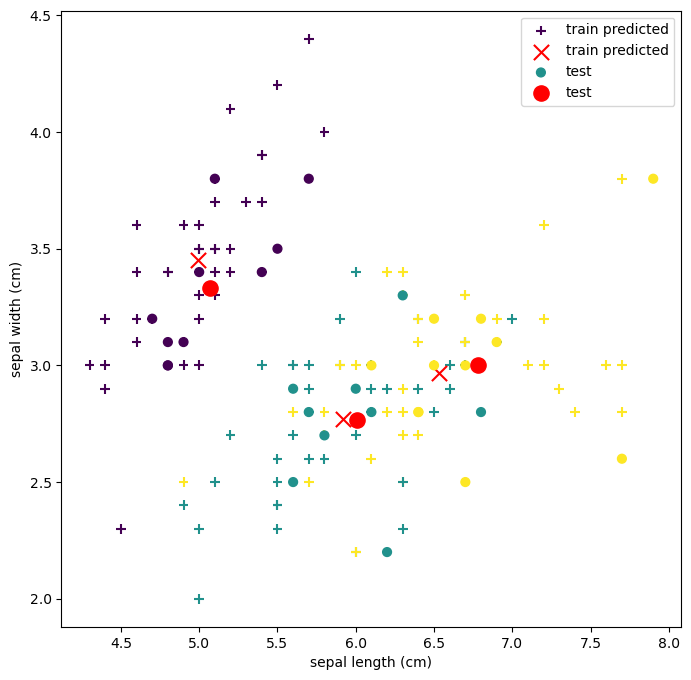

In [354]:
# оквадратим - снизим визульную плотность
plt.figure(figsize=(8,8)) 

# предсказанные значения
plt.scatter(
    x = axes_train['sepal length (cm)'], 
    y = axes_train['sepal width (cm)'], 
    c = y_train,
    marker = '+', label='train predicted',
    s = 50
)

plt.scatter(
    lda_train.means_[:, 0], 
    lda_train.means_[:, 1], 
    c = 'r', 
    marker = 'x', label='train predicted',
    s = 120)

# фактические значения
plt.scatter(
    x = axes_test['sepal length (cm)'], 
    y = axes_test['sepal width (cm)'], 
    c = y_test,
    marker = 'o', label='test',
    s = 40
)

plt.scatter(
    lda_test.means_[:, 0], 
    lda_test.means_[:, 1], 
    c = 'r', 
    marker = 'o', label='test',
    s = 120)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

plt.show()

### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width


Строим кластеризацию на полной базовой выборке (фактические данные)

### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

Из описания датасета напрашивается выбор 3 кластеров (3 типа цветков)
<br>Если проверить через инерцию, то можно выбрать 3-4-5 кластеров, дальше смысла нет.
<br>
1. строим для 3
2. строим для 5

In [355]:
# базово - 3 типа цветков - такая же базовая кластеризация
set(iris.target)

{0, 1, 2}

***Инерция***
<br> Плечо ломается в диапазоне 3-5 кластеров

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

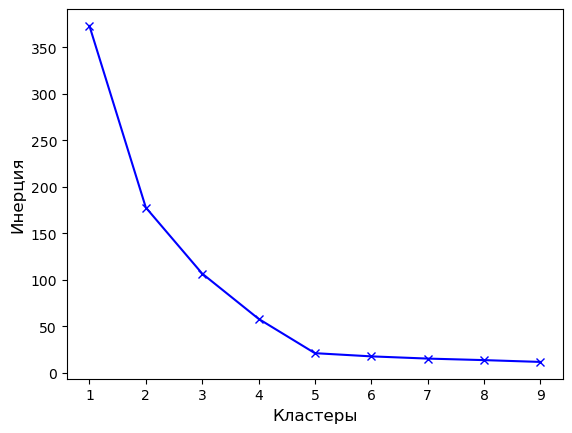

In [356]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    k_means =  KMeans(
        n_clusters = cluster_num,  
        random_state = 42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

***Проверим необходимость изменения размерности (размерность признаков сопоставимая - не изменяем)***
<br>
Размерность сопоставима - масштабирование не требуется

In [357]:
df_iris.head(15)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


***какой вообще разброс?***
<br>
На глаз можно "увидеть" только 2 кластера. (верхний левый угол, поменьше, и нижний правый)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

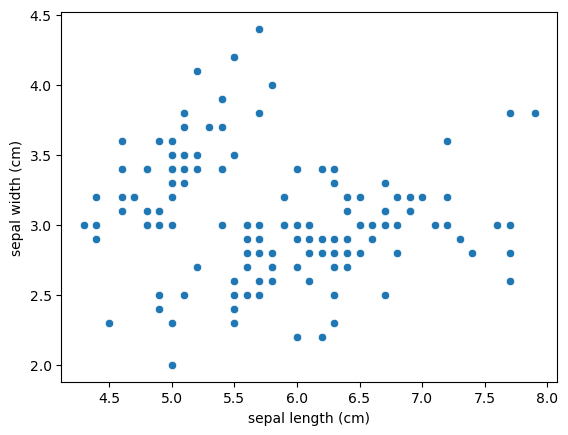

In [358]:
X = df_iris

sns.scatterplot(
    x = X['sepal length (cm)'], 
    y = X['sepal width (cm)']
)

***Построение на 3 кластера***

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

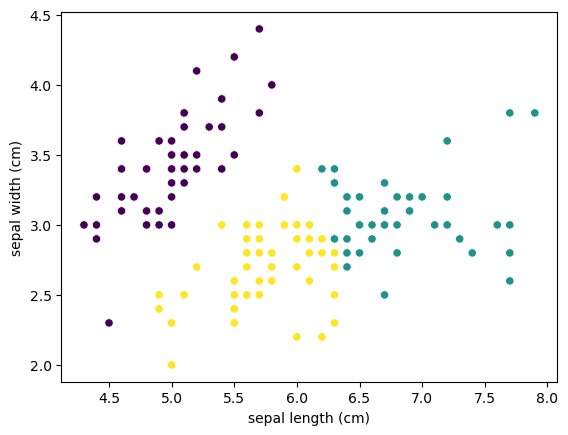

In [359]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(
    n_clusters = 3,
    random_state = 42)

# обучим и предскажем, к какому кластеру принадлежат ирисы
X_scaled = X #масштабирование не требуется, единицы похожие
predictions = kmeans.fit_predict(X_scaled)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
X['Clusters_k3'] = predictions

sns.scatterplot(
    x = X_scaled['sepal length (cm)'], 
    y = X_scaled['sepal width (cm)'], 
    c = predictions)

***Построение на 5 кластеров***
<br> Картинка контринтуитивна, если размшлять в логики действительной классификации цветков

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

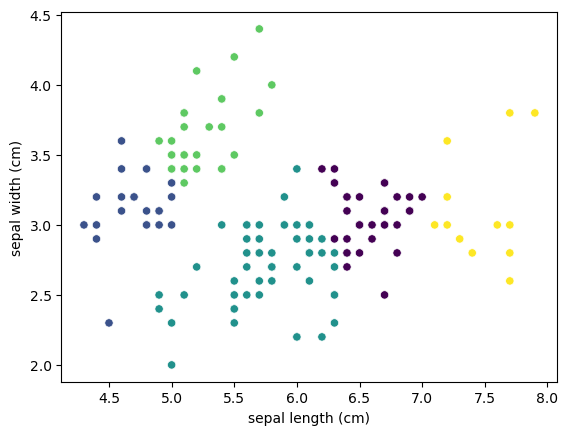

In [360]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(
    n_clusters = 5,
    random_state = 42)

# обучим и предскажем, к какому кластеру принадлежат ирисы
X_scaled = X #масштабирование не требуется, единицы похожие
predictions = kmeans.fit_predict(X_scaled)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
X['Clusters_k3'] = predictions

sns.scatterplot(
    x = X_scaled['sepal length (cm)'], 
    y = X_scaled['sepal width (cm)'], 
    c = predictions)

для теста повторим кластеризацию с масштабированием показателей (результат такой же)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

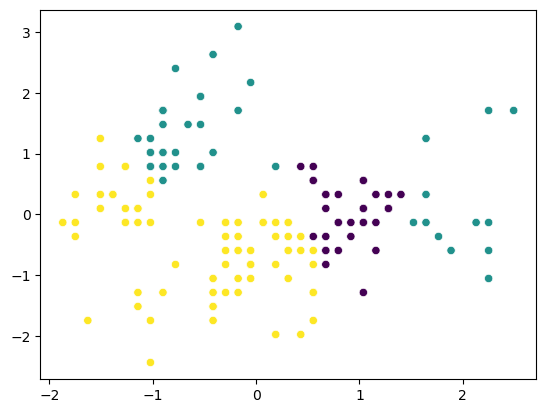

In [361]:

# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, random_state=42)

# обучим и предскажем, к какому кластеру принадлежат ирисы
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X) #масштабирование не требуется, единицы похожие
predictions = kmeans.fit_predict(X_scaled)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
X['Clusters_k3'] = predictions

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], c=predictions)
# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1])